In [13]:
!pip install mglearn

# 1. 패키지 임포트

In [14]:
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd


# 2. 데이터 불러오기 및 확인

In [15]:
df = pd.read_excel('/content/drive/MyDrive/데이터분석/데이터 반드시 알아야 할 모든 것/6. 머신러닝/KNN(K-근접이웃 모델)/Raisin_Dataset.xlsx')

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


# 3. 독립변수, 종속변수 테이블 분리 및 데이터 정규화

In [16]:
# 독립변수, 종속변수 분리
df_x = df.drop(['Area','Class'], axis =1)
df_y = df[['Class']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 칼럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()



,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


# 4. 학습셋, 데이터셋 분리

In [17]:
# 6:4로 생성
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size = 0.4, random_state= 10)

# 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))


train data 개수:  540
test data 개수:  360


# 5. 기존 KNN 모델 생성 및 정확도 확인

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 3,  # 이웃한 3개의 관측치를 기반으로 분류
                                 weights = 'uniform',   # weights』'uniform'은 이웃한 관측치와의 거리에 가중치를 주지 않는 옵션
                                 metric = 'minkowski')  # metric은 거리 측정 방식 옵션
classifier.fit(x_train, y_train)

# 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.8981481481481481
0.8416666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 6. k 옵션 1〜30의 모델 생성(거리 가중치 미적용)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

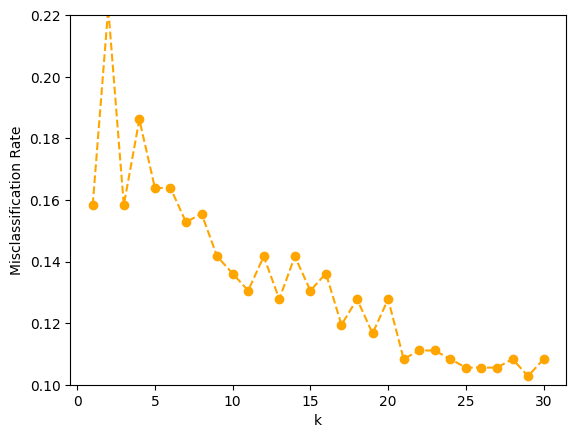

In [23]:
# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors= k, weights = 'uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.1, 0.22)
plt.show()

이웃이 5개부터 많이 줄어들고 있다

과도하게 늘리는 것은 연산량을 증가시켜 과적합을 유도할 수 있으므로 6개가 적정하다


# 7. k 옵션 1〜30의 모델 생성(거리 가중치 적용)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

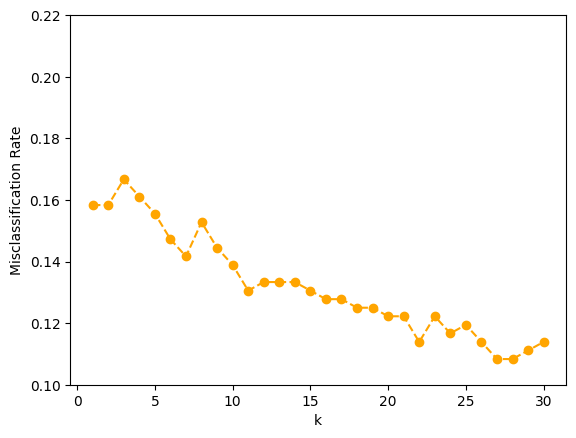

In [24]:
# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors= k, weights = 'distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.1, 0.22)
plt.show()

전체적으로 줄어들고 있다

# 8. k 옵션 1〜200의 모델 생성(거리 가중치 적용)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

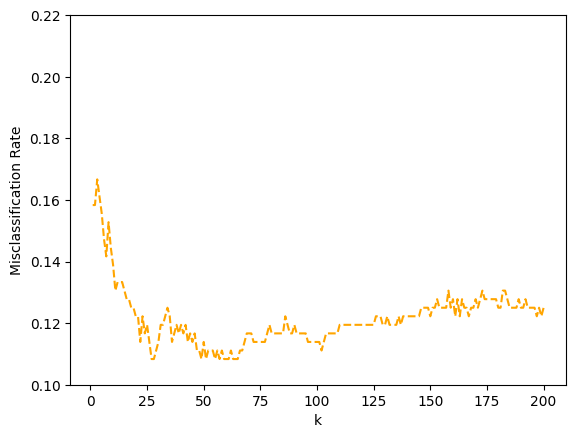

In [25]:
# k 수 범위 지정
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors= k, weights = 'distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.1, 0.22)
plt.show()

50개가 딱 적정해 보인다

# 9. 결정경계선 시각화를 위한 차원축소

In [28]:
# 주성분 개수 설정 (2개)
pca = PCA(n_components =2)
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1', 'C2'])

df_pca.head()

,C1,C2
0,-0.011114,0.057888
1,-0.150873,0.106697
2,-0.205711,-0.168037
3,-0.041009,0.191942
4,-0.223379,-0.113349


이웃 k수에 따라 KNN모델의 결정경계선이 어떻게 변화하는지 시각화하기 위해 독립변수를 두 개의 차원으로 축소했다

# 10. 이웃 k 수에 따른 결정경계선 차이 시각화

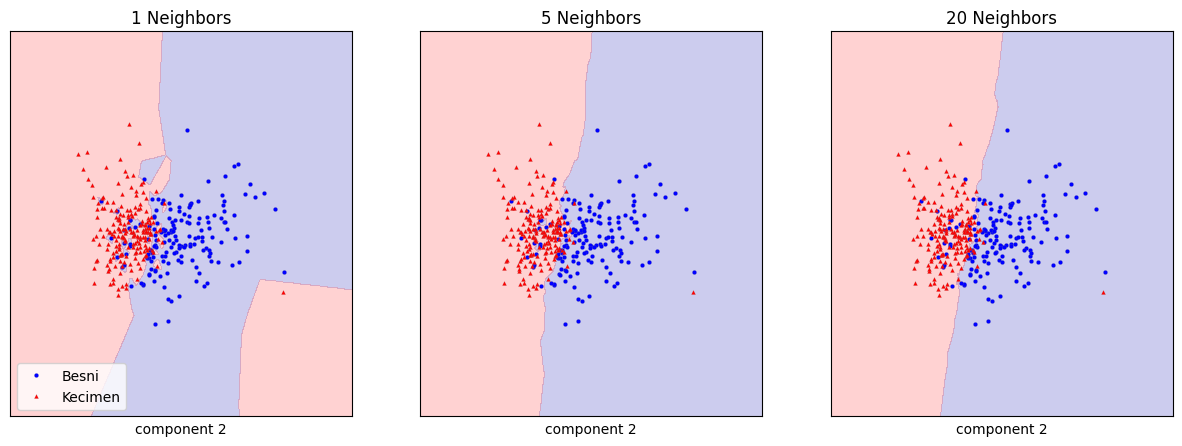

In [30]:
# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1,3,figsize=(15,5))

# 이웃 수 1, 5, 20에 따른 결정경계 시각화
for n_neighbors, ax in zip([1,5,20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x,
                                    fill=True, eps =0.5,ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:,0], df_vsl_x[:,1],
                             df_vsl_y, markeredgewidth=0.1,
                             c=['b','r'], s=3, ax=ax)

    ax.set_xlabel('component 1')
    ax.set_xlabel('component 2')
    ax.set_title('{} Neighbors'.format(n_neighbors))
axes[0].legend(loc=3)